# Overview
We’re going to explore a dataset describing the players who played in the 2012-13 European football (soccer) professional leagues. Data about the players’ ages, heights, weights, position, skintone rating, and more were included. Focus on exploring the data to find actionable insights, with an overarching goal of answering the following question: “Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?”

## Load Data
The csv file included with the material includes ~150k player/referee pairs (or 'dyads' as the documentation refers to them).  Memory usage is moderate, at just over 30 MB so we won't worry too much about memory management at present.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis overview and general tips
- Before plotting/joining/doing something, have a question or hypothesis that you want to investigate
- Next it is a good idea to get a general sense for what the data looks like
- Draw a plot of what you want to see on paper to sketch the idea
- Write it down, then make the plan on how to get there
- How do you know you aren't fooling yourself
- What else can I check if this is actually true?
- What evidence could there be that it's wrong?


## 1) What does the data look like?

In [2]:
df = pd.read_csv('redcard.csv')
print(df.shape)
print(df.columns)
#data_frame.info()

(146028, 28)
Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')


In [3]:
df.dtypes

playerShort       object
player            object
club              object
leagueCountry     object
birthday          object
height           float64
weight           float64
position          object
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID           object
rater1           float64
rater2           float64
refNum             int64
refCountry         int64
Alpha_3           object
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,145765.0,181.935938,6.738726,1.610000e+02,177.000000,182.000000,187.000000,2.030000e+02
weight,143785.0,76.075662,7.140906,5.400000e+01,71.000000,76.000000,81.000000,1.000000e+02
games,146028.0,2.921166,3.413633,1.000000e+00,1.000000,2.000000,3.000000,4.700000e+01
victories,146028.0,1.278344,1.790725,0.000000e+00,0.000000,1.000000,2.000000,2.900000e+01
ties,146028.0,0.708241,1.116793,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
defeats,146028.0,0.934581,1.383059,0.000000e+00,0.000000,1.000000,1.000000,1.800000e+01
goals,146028.0,0.338058,0.906481,0.000000e+00,0.000000,0.000000,0.000000,2.300000e+01
yellowCards,146028.0,0.385364,0.795333,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
yellowReds,146028.0,0.011381,0.107931,0.000000e+00,0.000000,0.000000,0.000000,3.000000e+00
redCards,146028.0,0.012559,0.112889,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00


## Understand how the data's organized
The dataset is a single file with every interaction between referee and player as a single row. In other words: Referee A refereed Player B in, say, 10 games, and gave 2 redcards during those 10 games. Then there would be a unique row in the dataset that said:

Referee A, Player B, 2 redcards, ... 

This has several implications that make this first step to understanding and dealing with this data a bit tricky. First, is that the information about Player B is repeated each time -- meaning:

### If we did a simple average of some metric of we would likely get a misleading result by double counting.

For example, asking "what is the average weight of the players?"

In [5]:
df.height.mean()

181.93593798236887

In [6]:
np.mean(df.groupby('playerShort').height.mean())

181.74372848007872

## Validating data health
It is a good idea to quickly explore the dataset to understand the overall health. A first measure of the data quality we check for empty fields in entries

In [7]:
null_vals = pd.concat([df.isnull().sum(),100*df.isnull().sum()/df.shape[0]],axis=1)
null_vals.columns = ['n_missing_vals','perc_missing']
null_vals

,n_missing_vals,perc_missing
playerShort,0,0.000000
player,0,0.000000
club,0,0.000000
leagueCountry,0,0.000000
birthday,0,0.000000
height,263,0.180102
weight,2243,1.536007
position,17726,12.138768
games,0,0.000000
victories,0,0.000000


There are several missing entries in the different categories. In particular, there is missing information on the players skin color, the attribute we want to study.  We can also visualize the distribution of missing data

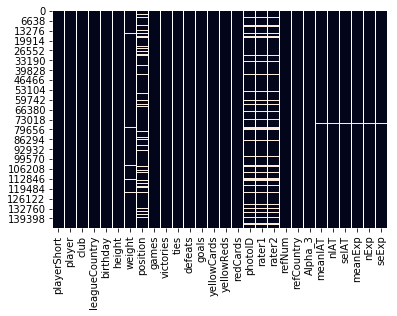

In [8]:
sns.heatmap(df.isnull(), cbar=False)

## Exploring the data: skin color

We see that roughly 15% of players are missing information on their skin color from one or two of the raters. These should be excluded if we want to explore the correlation between these and the number of red cards.  Lets check the instances where we only have one rater value

In [9]:
players  = df.groupby('playerShort')
print('All players: ', len(players))
print('Missing rater1 score: ', len(df[df.rater1.isnull()].groupby('playerShort')))
print('Missing rater2 score: ', len(df[df.rater2.isnull()].groupby('playerShort')))

All players:  2053
Missing rater1 score:  468
Missing rater2 score:  468


In [10]:
one_skin_tone_rating = np.logical_xor(df.rater1.isnull(),df.rater2.isnull())
print('Missing one, but not the other: ', one_skin_tone_rating.sum())

Missing one, but not the other:  0


## Let's fix the data frame
Good news! Entries have two or no entries for skin color. Let's remove these entries and understand the relationship between the raters. We can check the correlation between the two raters scores

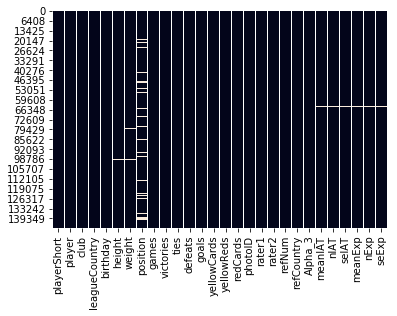

In [11]:
df = df[df.rater1.notnull()]
sns.heatmap(df.isnull(), cbar=False)

,rater1,rater2
rater1,1.000000,0.852792
rater2,0.852792,1.000000


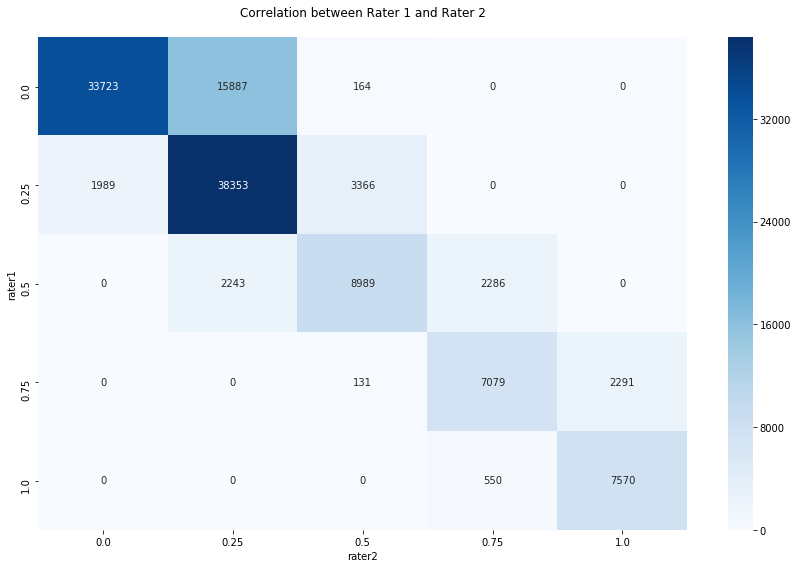

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(df.rater1, df.rater2), cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_title("Correlation between Rater 1 and Rater 2\n")
fig.tight_layout()
(df[['rater1','rater2']].corr()**2).T
# df[['yellowCards','yellowReds','redCards']].corr()**2

### More good news! 
The two skin tone scores are highly correlated. We can start by engineering our first feature and simply take the average of both scores and take a look at the distribution

In [13]:
df['skin'] = df[['rater1','rater2']].mean(axis=1)
df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


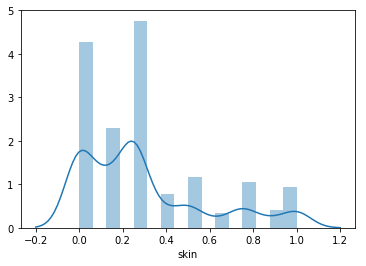

In [14]:
skintone = df.groupby('playerShort').skin.mean()
sns.distplot(skintone)

## Other player correlations
Just to illustrate lets take a look at other pairwise relationships in player attributes. Lets create a second dataframe with only the players information

In [15]:
player_index = 'playerShort'
player_cols = [#'player', # drop player name, we have unique identifier
               'birthday',
               'height',
               'weight',
               'position',
               'photoID',
                'skin'
              ]
players = df.groupby('playerShort').agg({col:'max' for col in player_cols})
players.head().T

playerShort,aaron-hughes,aaron-hunt,aaron-lennon,aaron-ramsey,abdelhamid-el-kaoutari
birthday,08.11.1979,04.09.1986,16.04.1987,26.12.1990,17.03.1990
height,182,183,165,178,180
weight,71,73,63,76,73
position,Center Back,Attacking Midfielder,Right Midfielder,Center Midfielder,Center Back
photoID,3868.jpg,20136.jpg,13515.jpg,94953.jpg,124913.jpg
skin,0.125,0.125,0.25,0,0.25


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1c4288f98>,
      dtype=object)

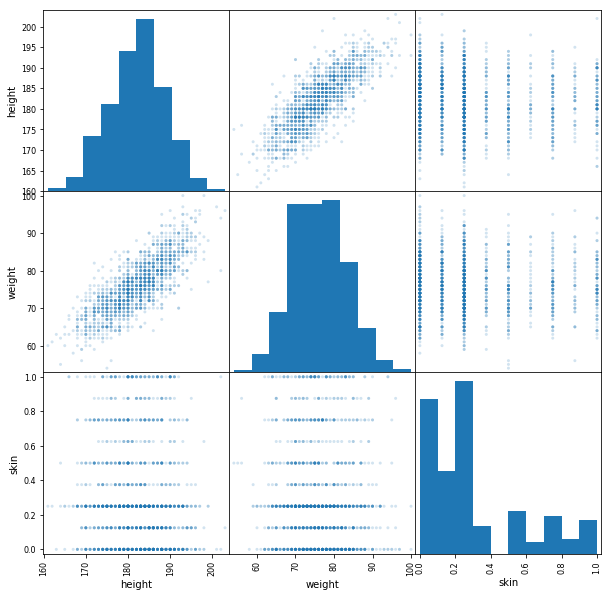

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
pd.tools.plotting.scatter_matrix(players[['height', 'weight', 'skin']], alpha=0.2, diagonal='hist', ax=ax)

## Weight vs. height
As expected, there is a clear correlation between the weight and height of players. Lets focus on this specific pair to extract a relationship.

In [38]:
from sklearn.linear_model import LinearRegression
players1 = players[players.height.notnull()]
players1 = players1[players1.weight.notnull()]

X = np.array(players1.weight).reshape(-1,1)
y = np.array(players1.height).reshape(-1,1)
reg = LinearRegression().fit(X,y)
print(reg.coef_, reg.intercept_)

[[0.75153439]] [124.90027714]


Text(0.1,0.8,'y = 0.75 x + 124.90')

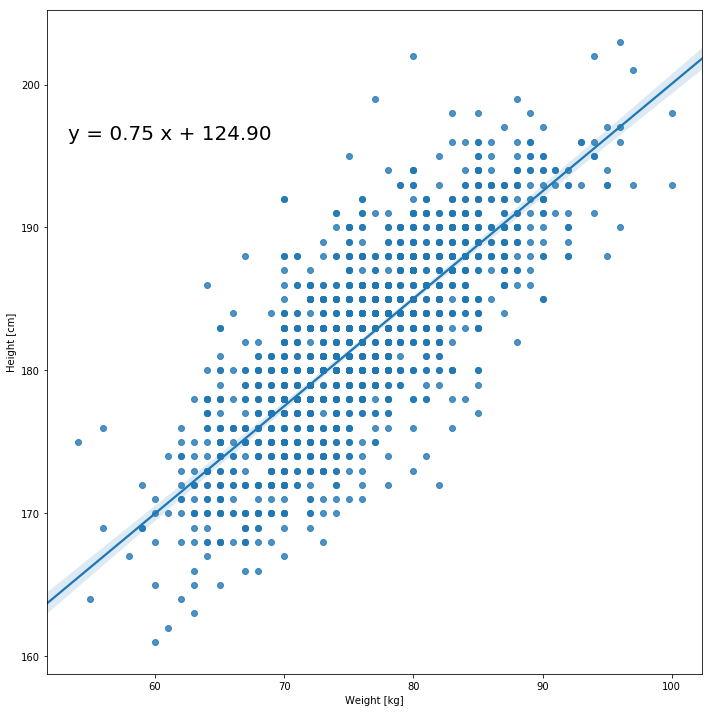

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot('weight', 'height', data=players, ax=ax)
ax.set_ylabel("Height [cm]")
ax.set_xlabel("Weight [kg]")
fig.tight_layout()
fig.text(0.1,0.8, 'y = %0.2lf x + %0.2lf' %(reg.coef_ , reg.intercept_), fontsize = 20)


## Positions
It is possible that the player position has a strong influece on the number of cards as well.

Text(0.5,0,'Position')

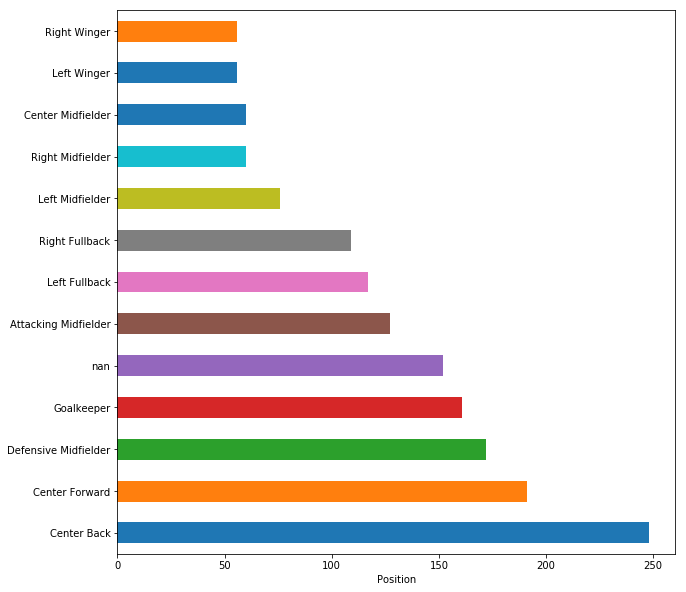

In [54]:
fig, ax = plt.subplots(figsize = (10,10))
players.position.value_counts(dropna=False).plot(kind='barh', ax=ax)
ax.set_xlabel('Position')

## Classify positions
In order to use this information later, lets split the positions into four categories. Modify th original datframe that has 

In [56]:
defense = ['Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder',]
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
keeper = 'Goalkeeper'

# modifying dataframe -- adding the aggregated position categorical position_agg
df.loc[df['position'].isin(defense), 'position_agg'] = "Defense"
df.loc[df['position'].isin(midfield), 'position_agg'] = "Midfield"
df.loc[df['position'].isin(forward), 'position_agg'] = "Forward"
df.loc[df['position'].eq(keeper), 'position_agg'] = "Keeper"

In [127]:
player_index = 'playerShort'
player_cols = [#'player', # drop player name, we have unique identifier
               'birthday',
               'height',
               'weight',
               'position_agg',
               'redCards',
                'skin'
              ]
players = df.groupby('playerShort').agg({col:'max' for col in player_cols})
players.groupby('position_agg').redCards.mean().T

position_agg
Defense     0.650155
Forward     0.462791
Keeper      0.503106
Midfield    0.484694
Name: redCards, dtype: float64

No statistically significant difference, though defense is more likely to have red cards...surprising that Keepers have a decent amount

## Exploring the data: refs and red cards
Most games have few red cards, i.e. the data set is very unbalanced, especially for cases where a player receives two.

In [ ]:
df.redCards.value_counts()

In [ ]:
# Almost all of the players appear with more than one referee
print('% of players with multiple refs: {:.4f}'.format(sum(df.playerShort.duplicated())/df.shape[0]))
# The same (but to a slightly lesser degree) is true for refs
print('% of refs with multiple players: {:.4f}'.format(sum(df.refNum.duplicated())/df.shape[0]))

In [ ]:
# Store categorical data as the appropriate data type
categorical_features = ['playerShort','club','leagueCountry','position','refNum','refCountry']
df[categorical_features] = df[categorical_features].astype('category')

## Feature sleection/engineering
Generally speaking we would like to reduce the number of features to the bare minimum needed to explain the data. In the following steps we will select or engineer the features we would like to work with.

First of all, as we saw, the skin tone scores from both raters are hgihly correlated so we can average them. We make a copy of the data frame so we don't breat anything

In [ ]:
# Engineered features
df_ = df.copy()
df_['skin'] = df[['rater1','rater2']].mean(axis=1)
df_['red_cards_per_game'] = (df.yellowReds+df.redCards)/df.games

We would like to drop the full names of players as this provides little information of use, we should first verify that that the player short names are unique 

In [ ]:
# Confirm that there is a 1:1 mapping from short to full name before dropping full name
flag_non_unique = False
for player_short in df.playerShort.unique():
    if df.player[df.playerShort==player_short].nunique() != 1:
        print('{} maps to multiple values'.format(player_short))
        flag_non_unique = True
if not flag_non_unique:
    print('1:1 mapping')


In [ ]:
df.head()

Select features to drop

In [ ]:
features_to_drop = ['player','birthday','photoID','yellowCards','rater1','rater2','yellowReds','redCards','games',\
                   'Alpha_3','nIAT','seIAT','nExp','seExp','playerShort','refCountry']
# features_to_drop = ['player','birthday','photoID','rater1','rater2','games',\
#                    'Alpha_3','nIAT','seIAT','nExp','seExp','playerShort','refCountry']
df_ = df_.drop(features_to_drop,axis=1)

In [ ]:
df_.shape
df_.head()

In [ ]:
df_.describe()

In [ ]:
# Check distribution of numerical variables
_ = df_.select_dtypes(['float64', 'int64']).hist(figsize=(10,10))
print('This all looks fine. Even the weight, with a max of exactly 100 kg, looks right')

In [ ]:
df_.corr()


doesn't look like skin tone correlated very heavily with anything...

In [ ]:
# Get rid of unused categories
categorical_features = df_.select_dtypes('category').columns
df_[categorical_features] = df_[categorical_features].apply(lambda x: x.cat.remove_unused_categories())

In [ ]:
n_duplicates = df_.duplicated().sum()
print(n_duplicates)

In [ ]:
df_.select_dtypes('category').nunique()

## Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [ ]:
df_rdm_frst = df_.dropna()
df_rdm_frst = df_rdm_frst.drop(['refNum','club'],axis=1)

In [ ]:
df_rdm_frst.select_dtypes('category').nunique()

In [ ]:
df_rdm_frst.head()

In [ ]:
X = df_rdm_frst.drop('red_cards_per_game',axis=1)
y = df_rdm_frst.red_cards_per_game

In [ ]:
# sklearn can't handle categoricals natively, so I will OHE these.
X_encoded = pd.get_dummies(X)

In [ ]:
param_grid = {'n_estimators': (5,10,50,100),
              'max_features': (5,8, 12, 16)
             }
clf = RandomForestRegressor()
grid = RandomizedSearchCV(clf, param_grid, cv=4, scoring='r2')

In [ ]:
grid.fit(X_encoded,y)

In [ ]:
grid.best_score_
grid.best_params_

In [ ]:
y_hat = grid.predict(X_encoded)
r2_original = metrics.r2_score(y,y_hat)
print(r2_original)

In [ ]:
tmpx = X_encoded.skin.values
np.random.shuffle(tmpx)
X_perm = X_encoded.copy()
X_perm.skin = tmpx

y_hat_perm = grid.predict(X_perm)
r2_perm = metrics.r2_score(y,y_hat_perm)
r2_perm

In [ ]:
df.head()

In [ ]:
df1 = df.groupby('refCountry')
df1.head()